In [1]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

p = sns.color_palette
np.random.seed(0)

## Generating a dataset

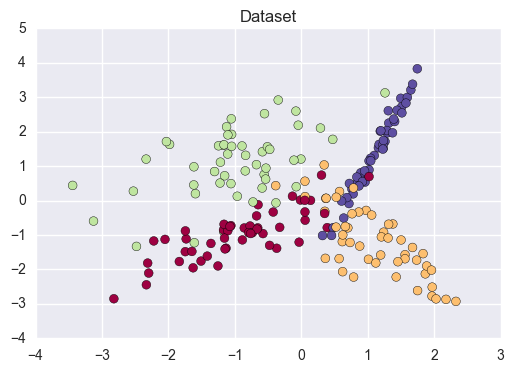

In [2]:
# Generate a dataset and plot it
X, Y = sklearn.datasets.make_classification(random_state=0, n_samples = 200, n_features = 2, n_redundant=0, n_informative=2, n_classes=4, n_clusters_per_class=1)
plt.scatter(X[:,0], X[:,1], s=40, c=Y, cmap=plt.cm.Spectral)
plt.title('Dataset')
plt.show()

In [3]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)

## KNN

Euclidean distance voting

In [4]:
k = 5

In [5]:
# Helper function to predict an output 
# x is vector
def predict(k, x):
    result = np.zeros(len(x))
    for count, xxx in enumerate(x):
#         print(count,'/',len(x))
        distance = [np.linalg.norm(xxx - i) for i in X]
        temp = 0
        result_temp = np.zeros(len(set(Y)))
        for i in np.argsort(distance)[::-1][:k]:
            result_temp[Y[i]] += 1
            temp += 1
        result[count] = np.argmax(result_temp)
    return result

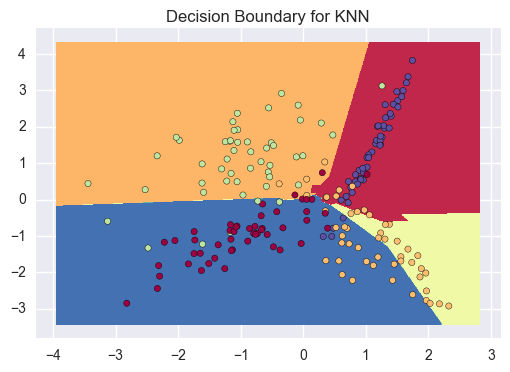

In [6]:
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(k, x))
plt.title("Decision Boundary for KNN")
plt.show()